## Buisness case:- Based on given feature predict whether a patient will have heart disease or not

In [1]:
## importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
##loading the dataset
data=pd.read_csv('heart.csv')

## Basic check

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
data.shape

(918, 12)

## Examine the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Domain Analysis

* Age: age of male/female

* Sex: Gender

* chestPainType: Most of the chest pain causes are not dangerous to health, but some are serious, while the least cases are life-threatening.(ASY,NAP,ATA,TA)

* RestingBP: blood pressure tells a lot about your general health. High blood pressure or hypertension can lead to several heart related issues and other medical conditions.Uncontrolled high blood pressure can lead to stroke. 

* Cholesterol: When there is too much cholesterol in your blood, it builds up in the walls of your arteries, causing a process called atherosclerosis, a form of heart disease. The arteries become narrowed and blood flow to the heart muscle is slowed down or blocked.

* FastingBS: fasting can help lower blood pressure, reduce cholesterol, control diabetes and reduce weight. “Four of the major risks for heart disease are high blood pressure and cholesterol, diabetes and weight, so fasting BS is not directely impact on heart disease.

* RestingECG: ECG or electrocardiogram is basically a window into your heart. It’s a very basic test that looks at the vectors or shape of your heart. It looks at the electrical activity of your heart. From ECG, we are able to detect hypertension, heart disease, congenital heart defects, hypertrophic obstructive cardiomyopathy (HOCM)

* MaxHR: It has been shown that an increase in heart rate by 10 beats per minute was associated with an increase in the risk of cardiac death by at least 20%, and this increase in the risk is similar to the one observed with an increase in systolic blood pressure by 10 mm Hg.

* Exercise Angina: Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.

* Oldpeak: ST depression induced by exercise relative to rest

* ST_slope: The ST segment shift relative to exercise-induced increments in heart rate, the ST/heart rate slope (ST/HR slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease (CAD).

* HeartDisease: yes(1),no(0)


## Explotary Data Analysis(EDA)

### Univariate Analysis

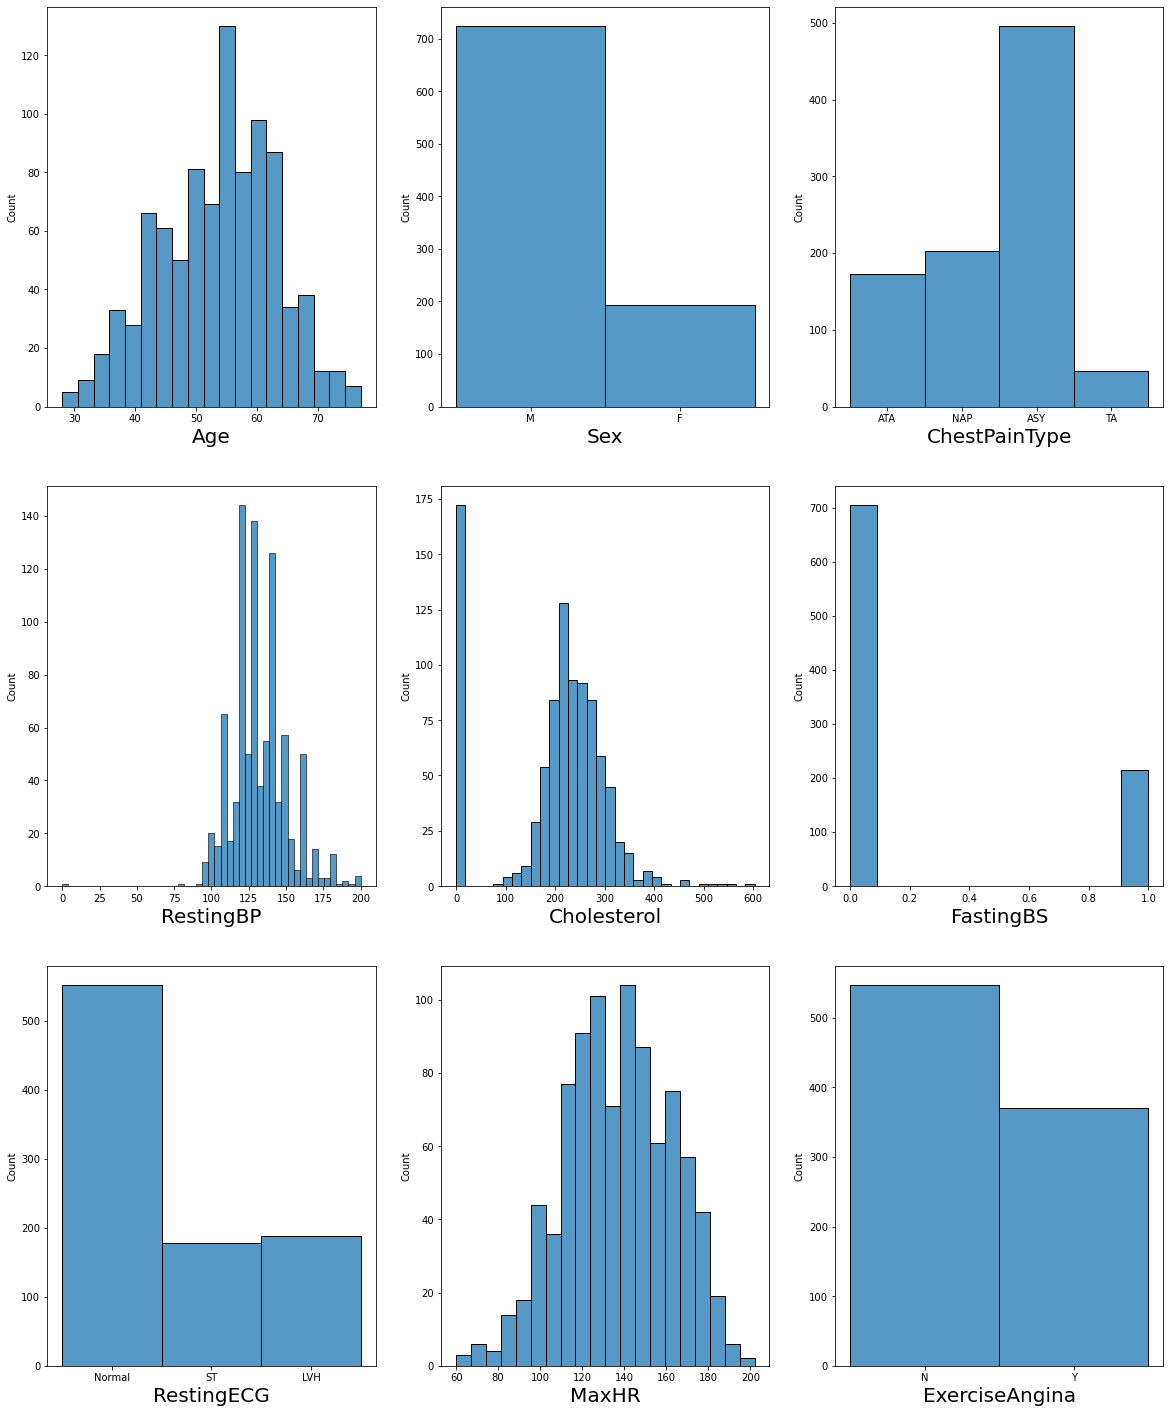

In [9]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in data.columns: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count  
        sns.histplot(x=data[column]) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
        
    plotnumber+=1 # increment of plotnumber 
plt.show()# to show graph

### Observation:-
#### Age: 
* The Age range between 30 to 75
* Most of the age counts between 50 to 62

#### Sex:
* male counts more than female

#### Chestpain Type: 
* In data 4 types of chestpain type
* ASY is Most comman chest pain than ATA, NAP, and TA

#### Resting BP:
* The resting blood pressure range between 75 to 200
* Maximum no of restingBP laying from 120 to 130.

#### Cholesterol:
* 0 cholestrol is maximum count in data
* Most of the cholesterol observation between 200 to 300

#### Fasting BS:
* Only two types of observation of fastingBS in data(0.0,1.0) 
* Teh range of fastingBS between 0.0 to 1.0

#### RestingECG:
* Maximunm count of normal restingECG is more than 500
* ST & LVH restingECG counts less than 200

#### MaxHR:
* MaxHR renge between 60 to 200
* the most comman(no.of observation) MaxHR between 110 to 150

#### Exercise Angina:
* Most no of people has no exercise angina
* less than 400 people have exercise angina


## Biavariate and Multivariate Analysis

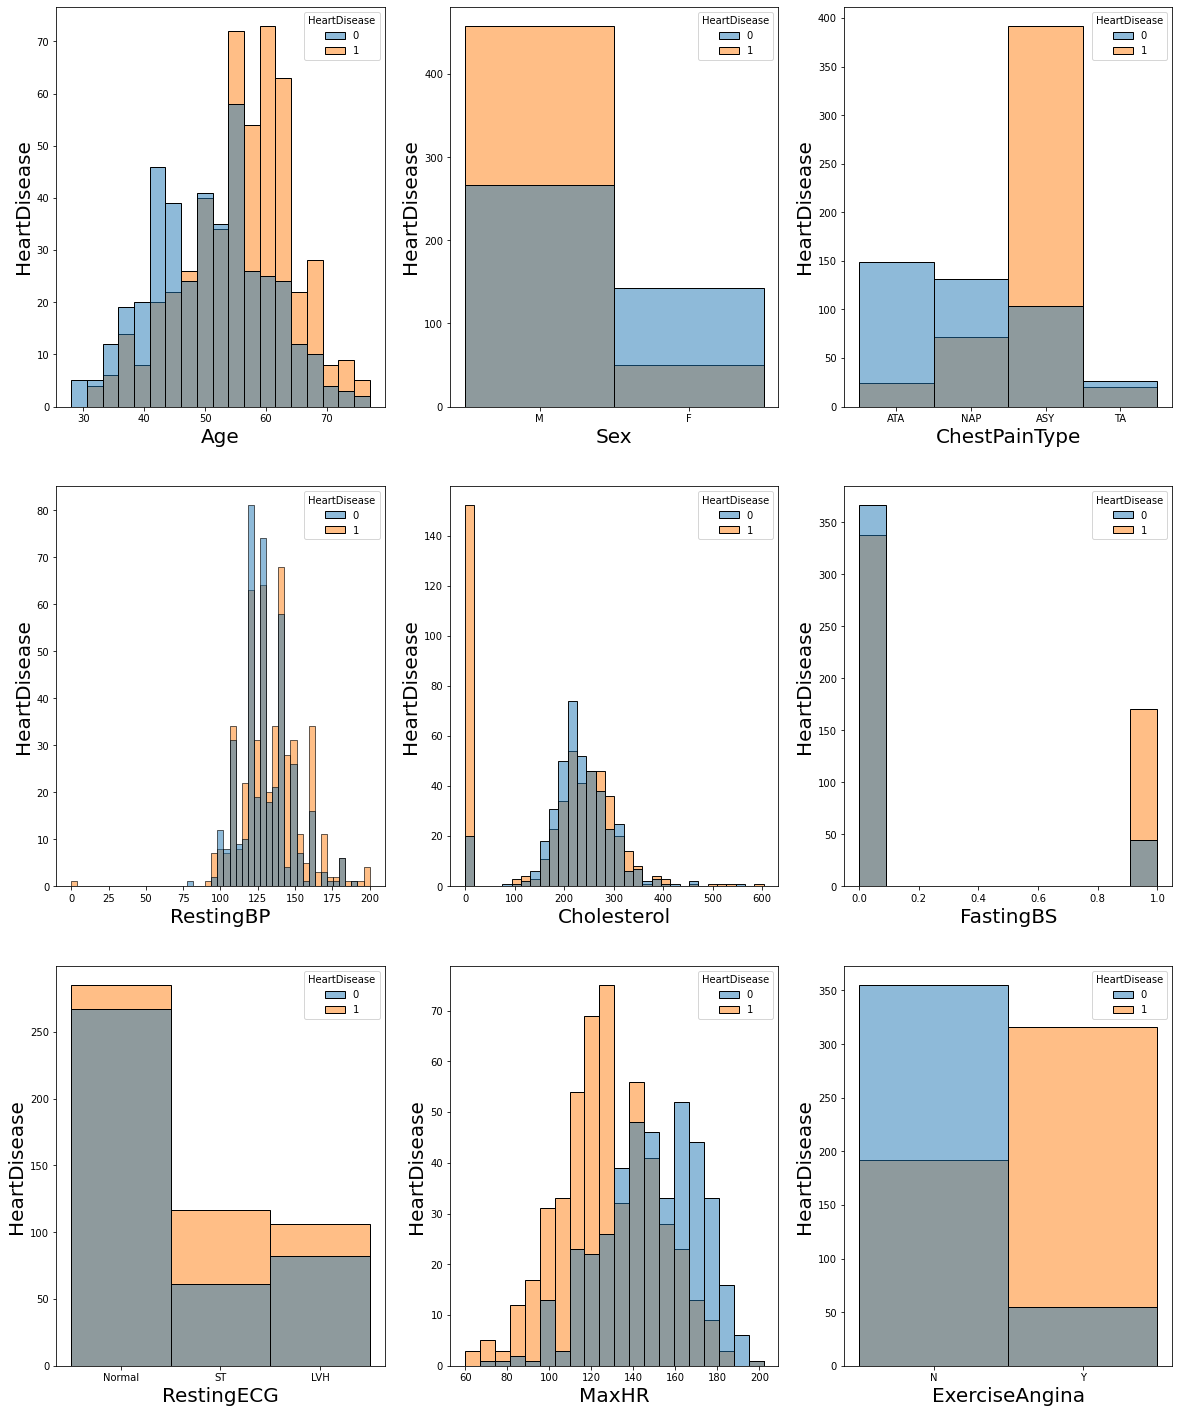

In [10]:
plt.figure(figsize=(20,25), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 


for column in data.columns: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count  
        sns.histplot(x=data[column],hue=data.HeartDisease) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=20) #assigning name to x-axis and "name" font size is 20
        plt.ylabel('HeartDisease',fontsize=20)#assigning name to y-axis and "name" font size is 20
    plotnumber+=1 # increment of plotnumber 
plt.show()# to show graph

### Observation:
#### 1.Impact of Age to heart disease:
* If the age is more than 58 the chance of heart disease is more
* In age of 30 no chance to get heart disease

#### 2.Impact of Sex to heart disease:
* Male are more chances to get heart diseas than female

#### 3.Impact of chestpain type to heart-disease:
* ASY type of chest pain has more heart disease
* ATA,NAP,& TA type of chestpain minimum heart disease

#### 4.Impact of RestingBP to heart disease:
* The blood pressure range between 140 to 160 more chances of heart disease

#### 5.Impact of cholesterol to heart disease:
* If the cholesterol is 0 maximum chance of heart disease.
* The range of cholesterol 200 to 300 heart disease chance 50-50%.

#### 6.Impact of FastingBS to heart disease:
* If fastingBS is 1.0 the more chance of heart disease. 
* FastingBS is less than 1.0 the minimum chance of heart disease.

#### 7.Imapct of restingECG to heart disease:
* ST restingECG is more chances of heart disease.
* Normal & LVH restingECG is less chance of heart disease.

#### 8.Impact of MaxHR to heaart disease:
* If MaxHR is decreases the chance of heart disease is more.
* If maxHR is increases the chance of heart disease is less.

#### 9.Impact of Exercise Angina to heart disease:
* If the Exercise angina is yes than chance of heart disease is more than NO.

## Feature Enginering / Data PreProcessing

### 1.Checking missing value

In [11]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

* No missing value in data

### 2. Convert Categorical data into numerical
* Onehot encoding
* lable encoding
* mannual encoding
* frequancy encoding
* ordinal encoding

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [13]:
### 1. sex
data.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [3]:
data.Sex = data.Sex.map({'M':1,'F':0}) ## assign male to 1 and female to 0

In [15]:
data.Sex.unique()

array([1, 0], dtype=int64)

In [16]:
### 2.chestpain 
data.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [4]:
data.ChestPainType = data.ChestPainType.map({'ASY':3,'NAP':2,'ATA':1,'TA':0})

In [18]:
data.ChestPainType.unique()

array([1, 2, 3, 0], dtype=int64)

##Use frequency encoding

In [19]:
### 3.Resting ECG
data.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [5]:
data.RestingECG = data.RestingECG.map({'Normal':2,'LVH':1,'ST':0})

In [21]:
data.RestingECG.unique()

array([2, 0, 1], dtype=int64)

### Use mannual encoding

In [22]:
### 4.Excercise Angina
data.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [6]:
data.ExerciseAngina = data.ExerciseAngina.map({'N':0,'Y':1})

In [24]:
data.ExerciseAngina.unique()

array([0, 1], dtype=int64)

In [25]:
### 5.ST_Slope use freqency encoding
data.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [7]:
data.ST_Slope = data.ST_Slope.map({'Flat':2,'Up':1,'Down':0})

In [27]:
data.ST_Slope.unique()

array([1, 2, 0], dtype=int64)

* All categorical data converted into numerical

### 3.Chnaging data-type

In [8]:
data.astype({'Sex':'int64','ChestPainType':'int64','RestingECG':'int64','ExerciseAngina':'int64','ST_Slope':'int64'}).dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

### 4.Checking Constant column

In [31]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,2.251634,132.396514,198.799564,0.233115,1.407407,136.809368,0.404139,0.887364,1.432462,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.793670,25.460334,0.490992,1.066570,0.618959,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,2.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,223.000000,0.000000,2.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,3.000000,140.000000,267.000000,0.000000,2.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


* No constant column in dataframe

#### GD_XG_BOOSTING is roobust to the outlier thats why not reauired to handle outliar and scaling 

## Feature selection

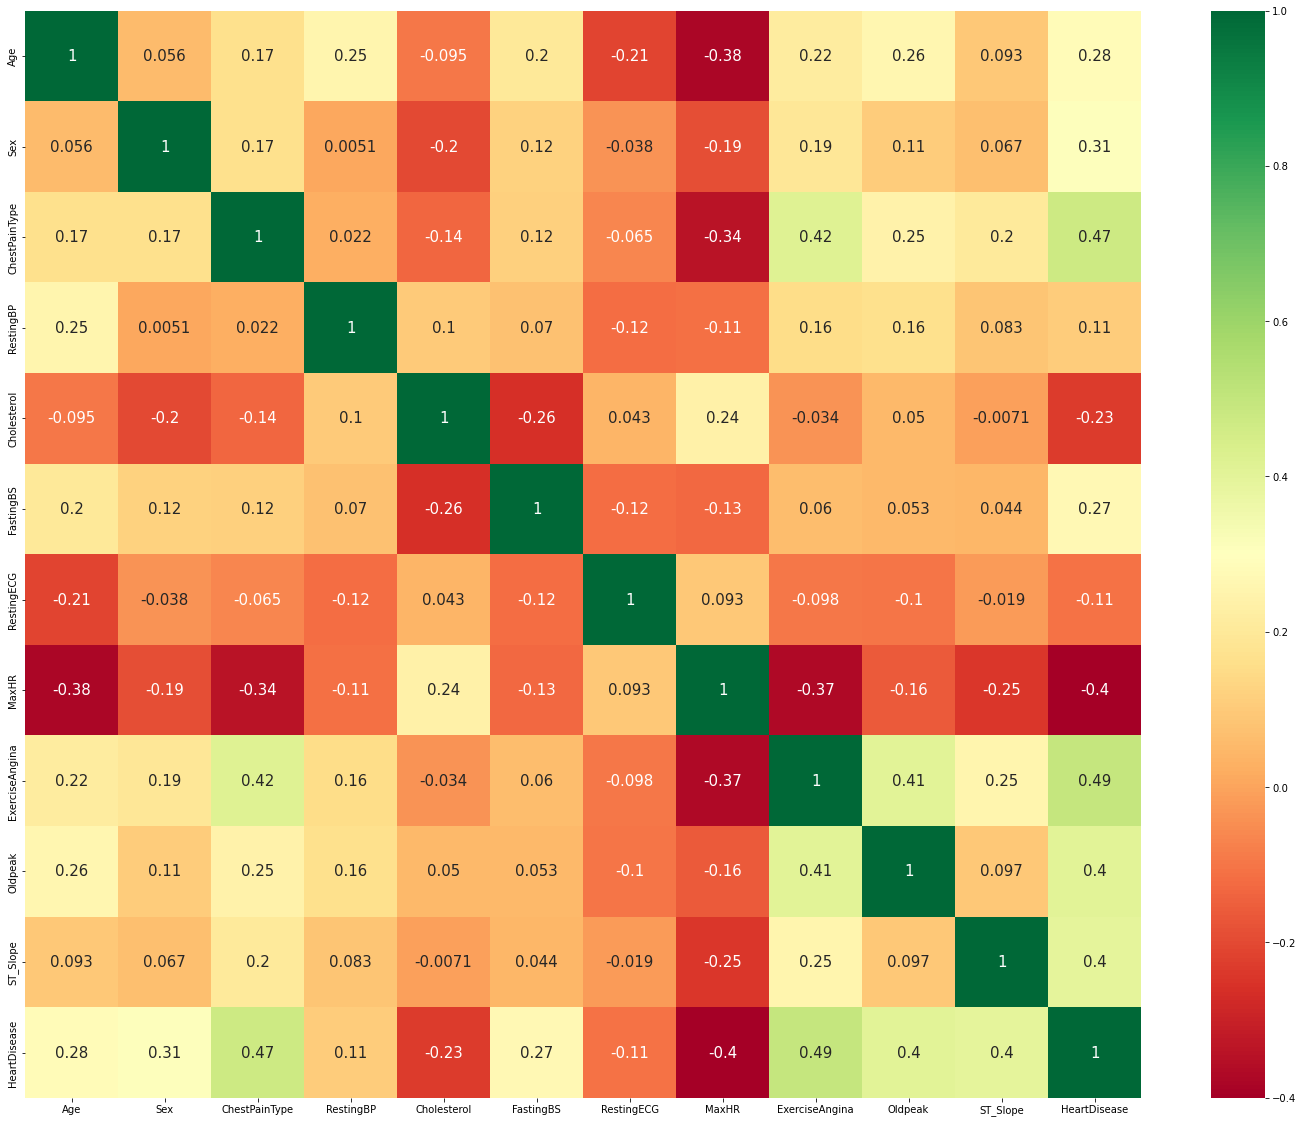

In [32]:
## Cheaking correlation
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn",annot_kws={'size':15})
plt.show()

* No highly corelated feature in dataset

## Model Creation

In [9]:
X = data.drop('HeartDisease',axis=1)  ## defining independant veraible
y = data.HeartDisease  ## defining dependant veriable

In [10]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,2,172,0,0.0,1
1,49,0,2,160,180,0,2,156,0,1.0,2
2,37,1,1,130,283,0,0,98,0,0.0,1
3,48,0,3,138,214,0,2,108,1,1.5,2
4,54,1,2,150,195,0,2,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,0,110,264,0,2,132,0,1.2,2
914,68,1,3,144,193,1,2,141,0,3.4,2
915,57,1,3,130,131,0,2,115,1,1.2,2
916,57,0,1,130,236,0,1,174,0,0.0,2


In [35]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [11]:
### create traning and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5) ### test size is default 25%

In [12]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
286,59,1,3,140,169,0,2,140,0,0.0,1
536,62,1,2,133,0,1,0,119,1,1.2,2
630,71,0,3,112,149,0,2,125,0,1.6,2
622,59,1,3,110,239,0,1,142,1,1.2,2
66,45,0,3,132,297,0,2,144,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
400,50,0,3,160,0,1,2,110,0,0.0,2
118,35,0,0,120,160,0,0,185,0,0.0,1
701,62,1,1,128,208,1,1,140,0,0.0,1
206,35,1,1,120,308,0,1,180,0,0.0,1


In [38]:
X_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
236,41,1,3,120,336,0,2,118,1,3.0,2
151,48,1,1,100,159,0,2,100,0,0.0,1
329,60,1,3,130,0,1,0,130,1,1.1,0
416,63,1,3,140,260,0,0,112,1,3.0,2
795,42,1,2,120,240,1,2,194,0,0.8,0
...,...,...,...,...,...,...,...,...,...,...,...
323,62,1,3,115,0,1,2,128,1,2.5,0
838,63,1,3,130,330,1,1,132,1,1.8,1
108,50,1,3,140,129,0,2,135,0,0.0,1
33,41,1,3,130,172,0,0,130,0,2.0,2


In [39]:
y_train

286    0
536    1
630    0
622    1
66     0
      ..
400    1
118    0
701    0
206    0
867    1
Name: HeartDisease, Length: 688, dtype: int64

In [40]:
y_test

236    1
151    0
329    1
416    1
795    0
      ..
323    1
838    1
108    0
33     1
132    1
Name: HeartDisease, Length: 230, dtype: int64

### SMOTE

In [13]:
data.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [14]:
### balnce the data with the help of smote(synthetic minority oversampling technique)
from imblearn.over_sampling import SMOTE
smote = SMOTE()  ### Object crearion

In [15]:
X_train_smote,y_train_smote =smote.fit_resample(X_train,y_train)

In [16]:
from collections import Counter
print('Actual Value:',Counter(y_train))
print('Smote Value:',Counter(y_train_smote))

Actual Value: Counter({1: 375, 0: 313})
Smote Value: Counter({0: 375, 1: 375})


### whai is Grediant boosting?
* Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier() ### Object creation
gbm.fit(X_train_smote,y_train_smote) ### fitting the model
y_gbm = gbm.predict(X_test) ### predicting

In [18]:
### evaluating the model
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report
recall = recall_score(y_test,y_gbm)
recall

0.9022556390977443

In [19]:
print(classification_report(y_test,y_gbm))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        97
           1       0.90      0.90      0.90       133

    accuracy                           0.89       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.89      0.89      0.89       230




## XGBoost
### Pros
1. Less feature engineering required (No need for scaling, normalizing data, can also handle missing values well)
2. Feature importance can be found out(it output importance of each feature, can be used for feature selection)
3. Fast to interpret
4. Outliers have minimal impact.
5. Handles large sized datasets well.
6. Good Execution speed
7. Good model performance (wins most of the Kaggle competitions)
8. Less prone to overfitting

### Cons
1. Difficult interpretation , visualization tough
2. Overfitting possible if parameters not tuned proper


In [20]:
from xgboost import XGBClassifier

In [21]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_xgb = xgb.predict(X_test)

In [22]:
print(classification_report(y_test,y_xgb))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        97
           1       0.90      0.89      0.90       133

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



### Hyper-Parameter tunning XG-Boost

In [34]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='f1',param_distributions=param_grid, n_iter=200, cv=3, 
                               verbose=3, random_state=5, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Best paramters: {'reg_lambda': 12.8, 'reg_alpha': 6.4, 'n_estimators': 130, 'max_depth': 11, 'learning_rate': 0.7, 'gamma': 0.2})


In [35]:
XGB2=XGBClassifier(reg_lambda= 12.8, reg_alpha= 6.4, n_estimators=130, max_depth=11, learning_rate=0.7, gamma=0.2)
XGB2.fit(X_train, y_train)#training 
y_xgb2=XGB2.predict(X_test)#testing
recall=recall_score(y_xgb2,y_test)#checking performance

In [36]:
recall

0.8970588235294118

In [37]:
print(classification_report(y_xgb2,y_test))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        94
           1       0.92      0.90      0.91       136

    accuracy                           0.89       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230

